# Searching and sorting
Now we're getting more into the 'numerical methods' part of the course!   

We will dive into the following:
* how to write **pseudo code** 
* **computational complexity** (big-O notion). 
* **search algorithms** (sequential, binary) 
* **sort algorithms** (bubble, insertion, quick)

**Search** and **sort** algos are at the heart of computer science.   
Understanding these is the first thing you get into at DIKU or DTU, so we are also going to get a taste of them. 

In [10]:
import numpy as np
import time
import string
import random
import sys
from IPython.display import Image

%matplotlib inline 
import matplotlib.pyplot as plt         # Baseline module
from mpl_toolkits.mplot3d import Axes3D # for 3D figures
plt.style.use('seaborn-whitegrid')      # whitegrid nice with 3D

# Algorithms - what are they even?
**Technically:** An unambigious specification of how to solve a class of problems.

**In a nut shell:** *An algo is a recipe.*  
Even a simple cooking recipe is an algorithm..

    1. Preheat the oven
    2. Mix flour, sugar and eggs
    3. Pour into a baking pan
    etc.
    
**Properties of an algorithm:**

1. Unambigious termination criteria
1. Pre-defined inputs
2. Pre-defined ouputs
3. Guaranteed finite runtime
4. Correct result

## Simple example: $\max\{ \ell\}$
**Problem:** Given a list of positive numbers, return the largest number in the list.

**Inputs:** A list `L` of positive numbers.

**Outputs:** A number.

**Algorithm:** `find_max()`
    
  1. Set `max` to 0.
  2. For each `x` in the list `L`, compare it to `max`. If `x` is larger, set `max` to `x`.
  3. `max` is now set to the largest number in the list.
  
> **Note:** The above is called **pseudo-code** (understandable across programming languages).

**Implementation** in Python:

In [2]:
def find_max(L):
    maxL = 0
    for x in L:
        if x > maxL:
            maxL = x
    return maxL

# Algorithm 1: Simple loops
Remember the problem we wanted to solve:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}}u(x_{1},x_{2})\\
 & \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Idea:** Loop through a grid of $N_1 \times N_2$ hypothetical solutions.  
This is the same as solving:
$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1,x_{2} \in X_2} x_1^{\alpha}x_2^{1-\alpha}\\
 & \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N_1-1}\frac{I}{p_1},\frac{2}{N_1-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
 X_2 & = \left\{0,\frac{1}{N_2-1}\frac{I}{p_2},\frac{2}{N_2-1}\frac{ I}{p_2},\dots,\frac{ I}{p_2}\right\} \\
p_{1}x_{1}+p_{2}x_{2} & \leq I\\
\end{aligned}
$$
\for example if $x_1 = \frac{I}{p_1}$, then $x_2 = 0$ \
Where we used the budget constraint to create the **grids** $X_1$ and $X_2$

In the module **grid_solve.py**, we have functions doing that.  
We must **import** those functions before using them in the notebook.   
First 2 lines ensures that we automatically load changes to any file while editing (**aalways add this**).  
Next we load all functions from `grid_solve` (`*` means get all in general)

## A look at the algorithm
Optimization Algorithms are iterative techniques that follow the following fundamental steps:
- Initialize with a guess of the decision variables $x$
- Iterate through the process of generating a list of improving estimates,
- check whether the terminating conditions are met, and the estimates will be probably stop at the solution point $x^*$

```Python
# All modules used within a module must be imported locally
import numpy as np

# You need to respecify the u_func, because the module does not share scope with the notebook. 
# That is, the module functions cannot see that u_func was defined in the notebook when find_best_choice is called

# remember Do One Thing principle is used here!
def u_func(x1,x2,alpha=0.50):
    return x1**alpha * x2**(1-alpha)

def find_best_choice(alpha,I,p1,p2,N1,N2,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N1,N2)
    x1_values = np.empty(shape_tuple)
    x2_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. initialize guess of x1=x2=0
    x1_best = 0
    x2_best = 0
    u_best = u_func(0,0,alpha=alpha)
    
    # c. loop through all possibilities
    for i in range(N1):
        for j in range(N2):
            
            # i. x1 and x2 (multiple/chained assignment)
            # Chained assignments are used as a shortcut when you want to bind several variables to the same value.
            x1_values[i,j] = x1 = (i/(N1-1))*I/p1
            x2_values[i,j] = x2 = (j/(N2-1))*I/p2
            
            # ii. utility (must be feasible)
            if p1*x1 + p2*x2 <= I: # u(x1,x2) if expenditures <= income 
                u_values[i,j] = u_func(x1,x2,alpha=alpha)
            
            else: # u(0,0) if expenditures > income, not allowed
                u_values[i,j] = u_func(0,0,alpha=alpha)
            
            # iii. check if best sofar
            if u_values[i,j] > u_best:
                # update best
                x1_best = x1_values[i,j]
                x2_best = x2_values[i,j] 
                u_best = u_values[i,j]
    
    # d. print
    if do_print:
        print_solution(x1_best,x2_best,u_best,I,p1,p2)

    return
x1_best,x2_best,u_best,x1_values,x2_values,u_values

# function for printing the solution
# remember Do One Thing principle is used here!
def print_solution(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.4f}')
    print(f'x2 = {x2:.4f}')
    print(f'u  = {u:.4f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.8f}') 

```

In [7]:
# Ensures automatic reloading of module
%load_ext autoreload 
%autoreload 2
from grid_solve import * # Import all functions from module + REMEMBER U NEED GRID_SOLVE FILE!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Go to `grid_solve` and inspect the function `find_best_choice`. It implements the algo above.   

In [8]:
# Call function and see output
# find_best_choice is the algo from `grid_solve.py`
sol = find_best_choice(alpha=0.25, I=10,p1=1,p2=2,N1=500,N2=400,do_print=True)
# See printed result below

x1 = 2.5050
x2 = 3.7469
u  = 3.3881
I-p1*x1-p2*x2 = 0.00125564


**Plot the solution:**

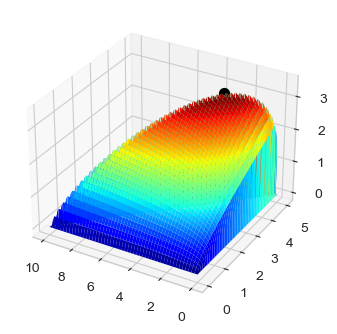

In [12]:
from matplotlib import cm # short for colourmaps
#%mathplotlib widget
# a. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol

# b. setup figure
fig = plt.figure(dpi=100,num='')
ax = fig.add_subplot(1,1,1,projection='3d')

# c. plot 3d surface of utility values for different choices
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)
ax.invert_xaxis()

# d. plot optimal choice
ax.scatter(x1_best,x2_best,u_best,s=50, color='black'); # s marker size

# %matplotlib inline

# Algorithm 2: Use monotonicity
**Better idea:** Loop through a grid of $N$ possible solutions for $x_1$ and assume the remainder is spent on $x_2$.   
This is the same as solving:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1} x_1^{\alpha}x_2^{1-\alpha}\\
 \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N-1}\frac{}{p_1},\frac{2}{N-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
x_{2} & = \frac{I-p_{1}x_{1}}{p_2}\\
\end{aligned}
$$

Function doing just this is `find_best_choice_monotone` in `grid_solve.py`

In [13]:
# a. Calling the algo using monotonicity
sol_monotone = find_best_choice_monotone(alpha=0.25,I=10,p1=1,p2=2,N=1000)

# b. unpack solution 
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_monotone

x1 = 2.5025
x2 = 3.7487
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000


**Plot the solution:**

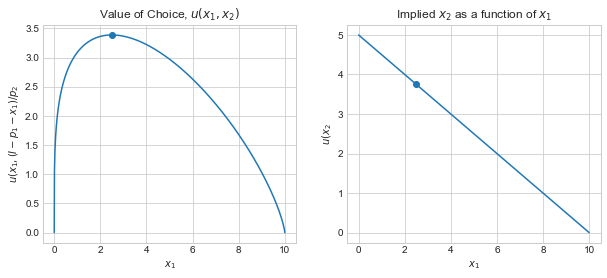

In [14]:
plt.style.use("seaborn-whitegrid")

# a. create the figure
fig = plt.figure(figsize=(10,4)) #fig size in inches
                 
# b. left plot
ax_left = fig.add_subplot(1,2,1) # 1 row 2 column plot and left graph index 1
                 
ax_left.plot(x1_values,u_values)
ax_left.scatter(x1_best,u_best)
                 
ax_left.set_title('Value of Choice, $u(x_1,x_2)$')
ax_left.set_xlabel('$x_1$')
ax_left.set_ylabel('$u(x_1,(I-p_1-x_1)/p_2$')
ax_left.grid(True) # If False then clear grid

# c. right plot
ax_right = fig.add_subplot(1,2,2) # 1 row 2 column plot and right graph index 2

ax_right.plot(x1_values,x2_values)
ax_right.scatter(x1_best,x2_best)

ax_right.set_title('Implied $x_2$ as a function of $x_1$')
ax_right.set_xlabel('$x_1$')
ax_right.set_ylabel('$u(x_2$')
ax_right.grid(True) 
plt.close(fig) # Suppress print to fit slides

#Plot graph
fig

# Algorithm 3: Call a solver

In [15]:
# Now we use the library scipy to do the heavy lifting
from scipy import optimize

Choose parameters for economic model:

In [16]:
alpha = 0.25 # preference parameter
I = 10       # income
p1 = 1       # price 1 
p2 = 2       # privce 2

### Case 1 - Scalar solver using montonicity  
Note that we are calling a **minimizer**. Take **negative** of utility.  
Recall that we if we spend everything on good one, we get $x_1 = I/p_1$.

Here we use minimization of scalar function of one variable.

In [19]:
# a. objective function (to minimize)
def value_of_choice(x1,alpha,I,p1,p2):   # creating objective function our optimizer takes
    x2 = (I-p1*x1)/p2
    return -u_func(x1,x2,alpha)  # remember to negate for maximization

# b. call solver   
sol_case1 = optimize.minimize_scalar(
    value_of_choice,         # our objective function
    method='bounded',        # 'bounded' uses brent to find local minimum in interval
    bounds=(0,I/p1),         # x1 has to be within 0 and Income divided by price of good 1
    args=(alpha,I,p1,p2))    # tuple that resembles what we want to put into function after x1 
# (i.e. the other arguments in the objective function)

# c. unpack solution 
x1 = sol_case1.x             # optimize over x1, x is return of solution array
x2 = (I-p1*x1)/p2            # implied optimal x2
u = u_func(x1,x2,alpha)      # implied utility

if sol_case1.success:
    print_solution(x1,x2,u,I,p1,p2)
    
else: print("Sorry, could not find a maximum.")

x1 = 2.5000
x2 = 3.7500
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000


### Case 2 - **Multi-dimensional constrained** solver, the *SLSQP*.
`SLSQP`: This is the Sequential Least Squares Programming method used for minimizing objective functions of multiple variables taking into consideration any combinations of bounds on the variables, any equality or inequality constrains imposed on them.

In [20]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    # note x is an array, but u_func takes scalars!
    return -u_func(x[0], x[1],alpha) # remember to negate

# b. constraints (violated if negative) and bounds, x is an array
# see cnote
constraints = ({'type': 'ineq', 'fun': lambda x: I-p1*x[0]-p2*x[1]}) 
bounds = ((0,I/p1),(0,I/p2)) 

# c. call solver, use SLSQP
initial_guess = [I/p1/2,I/p2/2]

sol_case2 = optimize.minimize(
    value_of_choice, initial_guess, args=(alpha,I,p1,p2),
    method='SLSQP', bounds=bounds, constraints=constraints)

# d. unpack solution, by default SLSQP returns a ndarray, shape (n,
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.4994
x2 = 3.7503
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000


- note, Then constraints are defined as a sequence of dictionaries, with keys type, fun and jac.
```Python
>>> cons = ({'type': 'eq',
...          'fun' : lambda x: np.array([x[0]**3 - x[1]]),
...          'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
...         {'type': 'ineq',
...          'fun' : lambda x: np.array([x[1] - 1]),
...          'jac' : lambda x: np.array([0.0, 1.0])})
```

### Case 3 - **Multi-dimensional *unconstrained*** solver with constrains implemented via penalties.

In [21]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    # i.unpack
    x1 = x[0]
    x2 = x[1]
    
    # ii. penalty
    penalty = 0
    E = p1*x1 + p2*x2 # Total expenses
    if E > I: # expenses > income -> not allowed
        fac = I/E # fac <1 if too high expenses, fac is a factor to normalize
        penalty += 1000*(E-I) # calculate penalty 
        x1 *= fac # Force E = I, renormalize to max_value
        x2 *= fac # Force E = I, renormalize to max_value
        
    return -u_func(x1,x2,alpha) + penalty # the error

# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case3 = optimize.minimize(
    value_of_choice,initial_guess,method='Nelder-Mead',
    args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.5000
x2 = 3.7500
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000


# Algorithmic complexity

Algorithms can be characterized by the number of operations needed to perform them. This is called their complexity. 

The `find_max()` algorithm has `n = len(L)` operations each making a *comparison* (`x > max`) and (perhaps) an *assignment* (`max = x`).

The number of operations increase linearily in the length of the input list (the order of the function is linear).

**Mathematically** we say that `find_max()` has linear complexity, \\(O(n)\\) where $n$ is the input size (length of L).

Other **common levels of complexity** are:

1. Constant, $O(1)$ (i.e. independent of input size)
2. Logarithmic, $O(\log n)$
3. Linear, $O(n)$
4. Log-linear, $O(n \log n)$
5. Quadratic, $O(n^2)$
6. Cubic, $O(n^3)$
7. Exponential, $O(2^n)$ (**curse of dimensionality**)

If the performance of an algorithm **depends on the exact values of the input** we differentiate between

1. **Best** case
2. **Average** case (across all possible inputs)
3. **Worst** case

Complexity is an **asymptotic** measure,

1. Only the number of operations matter (not their type or cost)
2. Only the highest order matter

<img src="https://github.com/NumEconCopenhagen/lectures-2019/raw/master/08/bigO.png" alt="bigO" width=40% />

**In practice however:** 

* The cost of each operation matters for fixed input size.
* The amount and flow of **memory** matter for speed (cache vs. RAM vs. disc). 
* Therefore, it is **not guaranteed** that an algorithm of lower complexity executes faster than that of higher complexity for all cases.  
    Especially, there may be differences in the costs of memory allocation and deletion which are not counted into the measure of complexity. In the case above, we were not counting in the *deletion* of objects, that would necessarily follow.   

## Example of a complexity calculation

In [9]:
def demo_algorithm(n):
    
    # a. 3 assignments
    a = 5
    b = 6
    c = 10
    
    # b. 3*n^2 multiplications and 3*n^2 assignments
    for i in range(n):
        for j in range(n):
            x = i * i
            y = j * j
            z = i * j 
            
    # c. multiplications, additions, and assignments 
    #      + n multiplications and assignments
    for k in range(n):
        w = a*k + 45
        v = b*b
        
    # d. 1 assignment
    d = 33

The **total number of operations** are:  $T(n) = 3 + 6n^2 + 5n + 1 = 6n^2 + 5n + 4$

Notice: this is an exposition of operations. There are of course also operations involved in multiplication itself, which means that the number above is not indicative of the *total* number of operations that the computer must handle.  

**In big-O notation**: `demo_algorithm()` is $O(n^2)$, i.e. *quadratic complexity*
-remember bi-O notation ignores constants: 5(n) --> O(n), as n grows 5 doesn't matter
-low order terms dominated by high-order ones, therefore big 'oh' of n is dropped in this example 


**$\large \color{purple}{Question}$:** What is the complexity of these two algoritms?



In [4]:
def algorithm_a(n):
    s = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                s += 1

def algorithm_b(n):
    s = 0
    for i in range(n):
        s *= 2
    for j in range(n):
        s *= 2
    for k in rangev(n):
        s *= 2

**Solution**: big-O is O(n^3) and 3*O(n)-->O(n)

## The complexity of operations on data containers

### How are lists and dictionaries structured?

The fact that our data containers have a certain structure in memory matters *greatly* for the speed of the methods (read: algos) that we apply on them.

Let's have a look at how lists and dictionaries are organized.

**Lists:**
* A list is an ordered set of references to objects (eg. floats). 
* Each reference *points* to an address in memory where values are stored.
* The reference variables of addresses (called pointers) of data in a list are ligned up next to each other in memory, such that they are increments of `1` apart. A bit like a train, if you will.
* Need therefore **only** to keep track of the reference to the address of the **first element**, `l[0]`, and the rest follows in line.
* If by $a$ we denote the address of the first element of `l`, then looking up element `l[i]` means accessing the $a+i$ address in memory using its reference variable.
* Therefore, the algorithmic complexity of looking up an element `l[i]` does **not depend** on the size of `l`. *Which is nice.* 

In [5]:
# A demonstration of addresses of elements in a list
x = [5, 21, 30, 35]
x_ref = [] 
x_id = []

# The addresses of x's elements
for i in x:
    x_id.append(id(i)) # Each object has its own unique id
    x_ref.append(hex(x_id[-1])) # The memory address is a hexadecimal of the id

# The addresses printed below are NOT lined up next to each other in memory. 
# Only the reference variables are lined up, but those we cannot see directly in Python.
print('Id of each element in x:')
for i in x_id:
    print(i)
print('\nMemory address of elements in x: ', x_ref)

Id of each element in x:
140615905057200
140615905057712
140615905058000
140615905058160

Memory address of elements in x:  ['0x7fe3b11219b0', '0x7fe3b1121bb0', '0x7fe3b1121cd0', '0x7fe3b1121d70']


### A quick overview of list operations

|Operation  | Code 				| Complexity     |
|:----------|:------------------|:--------------:|
|**Index:** |	`l[i]`          |	$O(1)$	     |
|**Store:** |	`l[i] = 0`      |	 $O(1)$	     |
|**Length:** |	`len(l)`        |	 $O(1)$	     |
|**Append:** |	`l.append(n)`   |	 $O(1)$	     |
|**Slice:** |	`l[a:b]`        |	 $O(b-a)$	 |
|**Pop last:** |	    `l.pop()`       |	 $O(1)$	     |
|**Pop i:** |	    `l.pop(i)`      |	 $O(N)$	     |
|**Clear:** |	`l.clear()`     |	 $O(N)$	     |
|**check:** |	`l1 == l2`      |	 $O(N)$      |
|**Insert:** |	`l[a:b] = ...`  |	 $O(N)$	     |
|**Delete:** |	`del l[i]`      |	 $O(N)$	     |
|**Containment:** |	x `in/not in l` |	 $O(N)$	 |
|**Copy:** |	`l.copy()`      |	 $O(N)$	     |
|**Sort:** |	`l.sort()`      |	 $O(N $Log$ N)$   |

**A few notes:** 
* Getting the length of a list is $O(1)$ because Python keeps track of a list's size as it created and expanded. The length is stored as an attribute to the list. 
* Popping (getting the last element) is $O(1)$ because it only requires detaching the last reference in the "train" of references that comprises a list. 
* Inserting an element into, or removing it from, the middle of a list requires moving around all the references in memory "behind" the inserted element and is therefore $O(N)$. 
* Checking for containment of an element is $O(N)$ because all elements in the list may have to be visited. 

### A beautiful solution
**Question:** how do you delete element `i` from list `l` in $O(1)$? (*even when it says above that `del` is an $O(N)$ operation*)   

**Answer:**

`l[i] = l.pop()`   

The `pop` operation will delete the last element of `l` while also using it to overwrite element `i` in `l`. Hence, last element is preserved while element `i` disappears. 

**Note** this won't work if `i` is the last element. A full implementation needs to account for this, but it will still be $O(1)$.



**Dictionaries:**
* A dictionary is a set of *buckets* (think lists) which can store items.
* A dictionary with 1 element and 5 buckets: `[] - [] - [] - [<key,value>] - []`
* Contrary to lists, there is no explicit indexing of a dictionary. No `d[i]`, we can use a string instead, `d[str]`. 
* However, the buckets of a dictionary are lined up just like a the references in a list. 
* Python therefore needs to locate a bucket, when adding a `<key,value>` pair. 
* Buckets are located using a **hash function** on the key of an element. 
* This **hash function** converts the key to a integer number, which can then serve as an index. 
* Obviously, a useful hash function must be very fast and work on strings as well as floats. 
* A fast hash function enables $O(1)$ lookup in a dictionary.
* Hashing also implies that `key in dict.keys()` is $O(1)$, thus independent of dictionary size! (Very handy)
* When an empty dictionary is created, it contains 5 buckets. As a 6th element is added to the dictionary, it is rescaled to 10 buckets. At 11 elements, rescaled to 20 buckets and so on. 
* Dictionaries thus **pre-allocate** memory to be efficient when adding the next element. 
* *Taking up memory in favor of fast execution is a basic trade-off in algorithms!*  

In [6]:
d = {'x': 1, 'z': 2}
print('size of md in bytes:', sys.getsizeof(d))

# Start adding elements to d and see how memory usage changes
for i in range(25):
    key = random.choice(string.ascii_letters)
    value = random.random()
    d[key] = value
    print(f"key: {key}  value: {value: 1.3f} \t  size: {i+1:2.0f}   bytes: {sys.getsizeof(d)} \t hashed key: {hash(key)}")
    
# Notice that there may be collisions as some keys are similar, and therefore get same hash value. 
# Python can handle such collisions, but they do create a drag on performance. 

size of md in bytes: 232
key: m  value:  0.319 	  size:  1   bytes: 232 	 hashed key: 7916298027240222066
key: d  value:  0.754 	  size:  2   bytes: 232 	 hashed key: 1759385477817345705
key: v  value:  0.466 	  size:  3   bytes: 232 	 hashed key: 8267407462748489640
key: t  value:  0.497 	  size:  4   bytes: 360 	 hashed key: 6145024203122979532
key: n  value:  0.010 	  size:  5   bytes: 360 	 hashed key: -5461290290935452715
key: P  value:  0.492 	  size:  6   bytes: 360 	 hashed key: 3280040346658119569
key: f  value:  0.675 	  size:  7   bytes: 360 	 hashed key: -3688833156443320346
key: Z  value:  0.375 	  size:  8   bytes: 360 	 hashed key: 9093898243244303425
key: r  value:  0.822 	  size:  9   bytes: 640 	 hashed key: -3495555808124913592
key: Q  value:  0.379 	  size: 10   bytes: 640 	 hashed key: -439426990254059589
key: s  value:  0.623 	  size: 11   bytes: 640 	 hashed key: 3242937649645545749
key: K  value:  0.677 	  size: 12   bytes: 640 	 hashed key: 8054177336983214130



### A quick overview of dictionary operations

|Operation  | Code 				| Complexity     |
|:----------|:------------------|:--------------:|
|**Index:** |	`d[k]`          |	$O(1)$	     |
|**Store:** |	`d[k] = v`      |	 $O(1)$	     |
|**Delete:** |	`del d[k]`      |	 $O(1)$	     |
|**Length:** |	`len(d)`        |	 $O(1)$	     |
|**Clear:** |	`d.clear()`     |	 $O(1)$	     |
|**View:** |	`d.keys()`      |	 $O(1)$	     |

Notice the difference in complexity for **deletions**. Faster in dictionaries because they are unordered. 

You can checkout a [comprehensive table](https://www.ics.uci.edu/~pattis/ICS-33/lectures/complexitypython.txt) of Python operations' complexity.

## Multiplication and Karatsuba's algorithm

Ever wondered how Python multiplies two numbers? It actually depends on the size of those numbers! 

**Small numbers:** 3rd grade algorithm. **Large numbers:** Karatsuba's algorithm. 

### Demonstration 

Consider the multiplication $2275 \times 5013 = 11,404,575$

**3rd grade algorithm**  
(this one we all know - although it's been a while)  
The 3rd grade algorithm is $O(n^2)$. To see this, think of the multiplication part as nested for-loops throughout the 10s, 100s, 1000s etc. Then there is the addition part, which is also $O(n^2)$.

**Karatsuba's algorithm**

It is not super intuitive what goes on here. But basically, it's splitting the numbers to be multiplied into multiples of 10s and then performs operations on those splits. 

The algorithm is only $O(n^{log_3})$, so better than 3rd grade algorithm for large $n$.

**Some preparation:**  

$x = 2275$, $y = 5013$

Note the identities:  
$x = 22 \times 10^2 + 75$  
$y = 50 \times 10^2 + 13$

We denote:  
$x_a = 22,  \: x_b = 75$  
$y_a = 50,  \: y_b = 13$

**The algorithm**

*First compute:*

$A = x_a \times y_a$  
$B = x_b \times y_b$  
$C = (x_a + x_b) \times (y_a +y_b) - A - B$

*Then we have that*  

$x \times y = A \times 10^4 + C\times 10^2 + B$

**In numbers**

$A = 22 \times 50 = 1100$  
$B = 75 \times 13 = 975$  
$C = (22 + 75)(50 + 13) - 1100 - 975   = 4036$  

$x \times y = 1100 \times 10^4 + 4036\times 10^2 + 975 = 11,404,575$

## Linear search (also called sequential search)
**GREAT VIDEO ON LINEAR SEARCH AND BINARY SEARCH:** https://www.youtube.com/watch?v=0AUYaLo64iI \
**Problem:** Check whether element is in list. See the `containment` row in the list of complexity above.

**Inputs:** A list `L` and a potential element `x`.
    
**Outputs:** Boolean.

**Algorithm:** `linear_search()`

  1. Set variable `found == False`
  2. For each `y` in the list `L`, compare it to `x`. If `x == y` set `found = True` and break loop.
  3. `found` now shows whether the element is in the list or not

**Drawback**: Linear search is rarely used practically because other search algorithms such as the binary search algorithm and hash tables allow significantly faster-searching comparison to Linear search!

In [11]:
L = [1, 2, 32, 8, 17, 19, 42, 13, 0] # test list

In [12]:
def linear_search(L,x):
    """ linear search
    
    Args:
    
        L (list): List to search in.
        x (any): Element to search for.
        
    Returns:
    
        found (bool): Boolean for whether element is in list or not.
    
    """
    
    # a. prep
    i = 0
    N = len(L)
    found = False

    # b. main
    while i < N and not found:
        if L[i] == x: # comparison
            found = True
        else:
            i += 1 # increment

    # c. return
    return found

In [13]:
print('found  3:',linear_search(L,3))
print('found 13:',linear_search(L,13))

found  3: False
found 13: True


**Analysis:** Each operation consists of a *comparison* and an *increment*:

1. **Best case:** $O(1)$ (element present and first in list, i.e. first guess = correct)
2. **Average case:** 
  * $O(\frac{n}{2})=O(n)$ (if element present), or 
  * $O(n)$ (if element *not* present) 
3. **Worst case:** $O(n)$ (element not present or last in list)


**Note:** Much faster ($O(1)$) on a dictionary, because we just apply the hash function to `x`.

## Binary search ("the phonebook search")
**Problem:** You know that a list is sorted. Check whether an element is contained in it. If not contained, then we will have a stopping condition i.e. pointers cross each other then "NOT FOUND".

**Inputs:** A list `L` and a potential element `x`.
    
**Outputs:** Boolean.

**Algorithm:** `binary_search()` --Remember we need to have sorted list--
  1. Set `found` to `False`, 
  2. Locate the `midpoint` of the list part that remains to be searched.  
  2. Check whether the `midpoint` is the one we are searching for:  
        * If yes, set `found=True` and go to step 3.
        * If no, and the `midpoint` is *larger*, restrict attention to the *left* part of the list and restart step 2 if not empty. I.e, "high" point is now excatly to the left of the midpoint AND RESET THE MIDPOINT.
        * If no, and the `midpoint` is *smaller*, restrict attention to the *right* part of the list and restart step 2 if not empty.
  3. `found` now shows whether the element is in the list or not

**Middle element:** Define the midpoint between index `i` and index `j >= i` as `i + (j-i)/2`, rounded down if necessary.

In [15]:
for i in [0,2,4]:
    for j in [4,5,9]:
        print(f'(i,j) = {i,j} -> midpoint = {i+((j-i)//2)}') # note integer division with //

(i,j) = (0, 4) -> midpoint = 2
(i,j) = (0, 5) -> midpoint = 2
(i,j) = (0, 9) -> midpoint = 4
(i,j) = (2, 4) -> midpoint = 3
(i,j) = (2, 5) -> midpoint = 3
(i,j) = (2, 9) -> midpoint = 5
(i,j) = (4, 4) -> midpoint = 4
(i,j) = (4, 5) -> midpoint = 4
(i,j) = (4, 9) -> midpoint = 6


In [14]:
L = [0, 1, 2, 8, 13, 17, 19, 32, 42] # test list

In [16]:
def binary_search(L,x,do_print=False):
    """ binary search
    
    Args:
    
        L (list): List to search in.
        x (any): Element to search for.
        do_print (bool): Indicator for printing progress.
        
    Returns:
    
        found (bool): Boolean for whether element is in list or not.
    
    """
    
    # a. initialize
    found = False
    
    # b. start with whole list
    first = 0 # low index pointer
    last = len(L)-1 # high index pointer
    
    # c. main
    while first <= last and not found: # keep going while low index pointer is smaller or equal to high index pointer

        # i. find midpoint
        midpoint = first + (last - first) // 2 # // is integer division
    
        if do_print:
            print(L[first:last+1],L[midpoint])
            
        # ii. check if x found or smaller or larger than midpoint
        if L[midpoint] == x:
            found = True # hey we found the index
        else:
            if L[midpoint] > x:
                last = midpoint-1 # move high point passed midpoint
            else:
                first = midpoint+1 # move low point to midpoint plus 1
    
    return found

In [17]:
print('found  3:',binary_search(L,3)) # remember 3 is not in list, so the stopping condition is that the high and low point cross each other
print('found 13:',binary_search(L,13))

found  3: False
found 13: True


In [18]:
binary_search(L,32,do_print=True)

[0, 1, 2, 8, 13, 17, 19, 32, 42] 13
[17, 19, 32, 42] 19
[32, 42] 32


True

**Terminology:** This is called a **divide-and-conquer** algorithm.
**Analysis:**

* After 1 comparison there is approximately $\frac{n}{2}$ elements left.
* After 2 comparisons there is approximately $\frac{n}{4}$ elements left.
* After 3 comparisons there is approximately $\frac{n}{8}$ elements left.
* ...
* After $j$ comparisons there is approximately $\frac{n}{2^j}$ number of elements left.

**When is there one element left?**  $\frac{n}{2^j} = 1 \Leftrightarrow j = \frac{\log n}{\log 2}$

**Result:** The binary search algorithm is $O(\log n)$, i.e. logarithmic complexity.

# Recursion
In CS recursion is a way of solving a problem by having a function call itself. 
**Problem:** Sum the elements in a list.

In [15]:
L = [1,3,5,7,9]

**Simple:** Just sum them:

In [16]:
def listsum(L):
    result = 0
    for x in L:
        result += x
    return result

print(listsum(L))

25


**Recursion:** The sum of a list is the sum of the first element and the sum of the rest of the list:

In [17]:
def listsum_recursive(L):
    if len(L) == 1:
        return L[0]
    else:
        return L[0] + listsum_recursive(L[1:])

print(listsum_recursive(L))

25


This is also a divide-and-conquor strategy. Avoids loops.

## Fibonacci numbers

**Definition:**

$$
\begin{aligned}
F_0 &= 0 \\
F_1 &= 1 \\
F_n &= F_{n-1} + F_{n-2} \\
\end{aligned}
$$

**Implementation:**

In [18]:
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return fibonacci(n-1)+fibonacci(n-2)

fibonacci(5)
#for n in range(4):
     #print(fibonacci(n)) i.e. the fifth number in the fibonacci sequence

5

### Caution! 
This implementation is for demonstration purposes only. It can be greatly sped up by using the `@cache` decorator, which stores the previous return value of a function call. 

If you ever want to use recursion, you must rely on **caching** of function values. Because ***recursion on itself is sloow***. 

**Test approximate formula:**

In [19]:
def fibonacci_approx(n):
    return 1/np.sqrt(5)*( ((1+np.sqrt(5))/2)**n - ((1-np.sqrt(5))/2)**n)

for n in [5,10,15,20,25]:
    print(f'n = {n:3d}: true = {fibonacci(n):6d}, approximate = {fibonacci_approx(n):20.12f}')

n =   5: true =      5, approximate =       5.000000000000
n =  10: true =     55, approximate =      55.000000000000
n =  15: true =    610, approximate =     610.000000000000
n =  20: true =   6765, approximate =    6765.000000000005
n =  25: true =  75025, approximate =   75025.000000000058


## Advanced: Binary search with recursion

In [20]:
L = [0, 1, 2, 8, 13, 17, 19, 32, 42,] # test list

def binary_search_recursive(L,x):
    pass

print('found  3:',binary_search_recursive(L,3))
print('found 13:',binary_search_recursive(L,13))

found  3: None
found 13: None


In [21]:
def binary_search_recursive(L,x):
    """ recursive binary search
    
    Args:
    
        L (list): List to search in.
        x (any): Element to search for.
        
    Returns:
    
        found (bool): Boolean for whether element is in list or not.
    
    """
    
    if len(L) == 0: 
    
        return False # not found
    
    else:
        
        # a. find midpoint
        midpoint = len(L)//2
        
        # b. check if x found or smaller or larger than midpoint
        if L[midpoint] == x: # found
            return True
        else:            
            if L[midpoint] > x:
                newL = L[:midpoint]
            else:
                newL = L[midpoint+1:]
            return binary_search_recursive(newL,x)

In [22]:
print('found  3:',binary_search_recursive(L,3))
print('found 13:',binary_search_recursive(L,13))

found  3: False
found 13: True


# Sorting
Sorting is a super central task of computing. IBM invented it's first computers in the 30s to sort data. 

Would be hard to keep track of data without sorting. Thus, many algorithms have been developed for this purpose. 

We will look at a simple algorithm first, the bubble sort, which relies on swapping elements iteratively. 

Function for **swapping** element `L[i]` with element `L[j]` in-place:

In [23]:
def swap(L,i,j):
    temp = L[i] # save value in place holder variable
    L[i] = L[j] # overwrite value at i with value at j
    L[j] = temp # write original value at i to value at j

**Example:**

In [24]:
L = [1, 3, 4, 9, 13] 
swap(L,i=0,j=1)
print('after swap',L)

after swap [3, 1, 4, 9, 13]


## Bubble sort
**Great video:** https://www.youtube.com/watch?v=xli_FI7CuzA \
**Problem:** Sort a list of numbers in-place.

**Inputs:** List of numbers.

**Outputs:** None.

**Algorithm:** `bubble_sort()`

  1. Loop through the first n-1 elements in list, swap with next element if current is larger.
  2. Loop through the first n-2 elements in list, swap with next element if current is larger.
  <br>
  ...
  <br>
  4. Loop through the first 3 elements in list, swap with next element if current is larger.
  5. Swap the two first elements if the first is larger than the second
  6. List is sorted
  

In [25]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20] # test list       

def bubble_sort(L):
    pass

bubble_sort(L)
print(L)

[54, 26, 93, 17, 77, 31, 44, 55, 20]


In [52]:
def bubble_sort(L):
    """ bubble sort
    
    Args:
    
        L (list): List of numbers
        
    """
    
    # k starts being len(L)-1 and is decreased by 1 until hitting 0
    for k in range(len(L)-1,0,-1): # we will not be able to acces L[i+1] if last element, therefore range is Len(L)-1, stop at zero and incrementation is 1
        for i in range(k):
            if L[i] > L[i+1]: # if element at L[i] is greater than element at position L[i+1] we will swap the two elements
                swap(L,i,i+1) 

L = [54, 26, 93, 17, 77, 31, 44, 55, 20]      
bubble_sort(L)
print('sorted L:',L)

sorted L: [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Another visualization of bubble sort**  
![bubble](https://upload.wikimedia.org/wikipedia/commons/5/54/Sorting_bubblesort_anim.gif)

**Illustration with printout:**

In [27]:
def bubble_sort_with_print(L):
    for k in range(len(L)-1,0,-1):
        print(f'step = {len(L)-k}')
        for i in range(k):
            if L[i] > L[i+1]:
                swap(L,i,i+1)
            print(L)                
        print('')
        
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]        
print('original',L,'\n')
bubble_sort_with_print(L)

original [54, 26, 93, 17, 77, 31, 44, 55, 20] 

step = 1
[26, 54, 93, 17, 77, 31, 44, 55, 20]
[26, 54, 93, 17, 77, 31, 44, 55, 20]
[26, 54, 17, 93, 77, 31, 44, 55, 20]
[26, 54, 17, 77, 93, 31, 44, 55, 20]
[26, 54, 17, 77, 31, 93, 44, 55, 20]
[26, 54, 17, 77, 31, 44, 93, 55, 20]
[26, 54, 17, 77, 31, 44, 55, 93, 20]
[26, 54, 17, 77, 31, 44, 55, 20, 93]

step = 2
[26, 54, 17, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 31, 77, 44, 55, 20, 93]
[26, 17, 54, 31, 44, 77, 55, 20, 93]
[26, 17, 54, 31, 44, 55, 77, 20, 93]
[26, 17, 54, 31, 44, 55, 20, 77, 93]

step = 3
[17, 26, 54, 31, 44, 55, 20, 77, 93]
[17, 26, 54, 31, 44, 55, 20, 77, 93]
[17, 26, 31, 54, 44, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]

step = 4
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 

**Analysis:** Bubble sort is $T(n) = (n-1)\times(n-1)\times c = cn^2-2cn+1 => O(n^2)$, where $n$ is size of the array! \
The reason being the two loops run n-1 times and then we have c times of if len[i]> len[i+1] swap.
Therefore bubble sort is slow sorting algo. 

## Insertion sort
**Great video**: https://www.youtube.com/watch?v=i-SKeOcBwko \
**Algorithm:** `insertion_sort()`

  1. Consider the *second* element as first one is already sorted . Insert it correctly in the list of the numbers before the *second* element.
  2. Consider the *third*  element. Insert it correctly in the list of the numbers before the *third* element.
  <br>
  ...
  <br>
  4. Consider the n'th element. Insert it correctly in the list of the numbers before the *n'th* element.
  5. List is sorted
  
  

**Illustration:**

<img src="https://github.com/NumEconCopenhagen/lectures-2019/raw/master/08/insertionsort.png" alt="insertionsort" width=50% />

In [53]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20] # test list

def insertion_sort(L):
    pass #executes nothing

insertion_sort(L)
print(L)

[54, 26, 93, 17, 77, 31, 44, 55, 20]


In [56]:
def insertion_sort(L):
    """ insertion sort
    
    Args:
    
        L (list): List of numbers
        
    """
    
    # loop over last n-1 elements, skipping the 1st element (see range func).  
    n = len(L)
    for k in range(1,n):  
        
        # a. 
        x = L[k] # store current value
        i = k # store position/index ("hole")
        
        # b. move left while larger: a bubble sort at heart
        while i > 0 and L[i-1] > x: # while hole is greater than zero and hole -1 is greater than current value, 
        # if not fulfilled we exit while loop
            L[i] = L[i-1] # shift element at index "hole - 1" to "hole"
            i = i-1 # new hole
        
        # c. insert current value to the "hole", when we exit while loop
        L[i] = x

L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
insertion_sort(L)
print('sorted',L)        

sorted [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Analysis:** Still $O(n^2)$..

**Benefits relative to bubble sort:**

1. Moves instead of swaps, 1 operation less.
2. Data is often **partially sorted** to begin with. Insertion sort benefits from that.

## Partition (+)
**Great video** For partition and quicksort: https://www.youtube.com/watch?v=COk73cpQbFQ&list=PL2_aWCzGMAwKedT2KfDMB9YA5DgASZb3U&index=7 \
*Intermezzo: Solving the partition problem is useful for a so-called quicksort.*
**Problem:** Permute a list and return a splitpoint such that all elements before the point is larger than or equal to the first element in the original list, and all elements afterwards are strictly larger.

**Input:** List of numbers.

**Output:** Integer.

**Algorithm:**

0. Let splitting point be first element of list.
1. From the *left* find the first element larger than split point (leftmark).
2. From the *right* find the first element smaller than split point (rightmark).
3. Swap these two elements.
4. Repeat 1-3 starting from previous leftmark and rightmark. Continue until leftmark is larger than rightmark.
5. Swap first and rightmark element.
6. Return the rightmark.

<img src="https://github.com/NumEconCopenhagen/lectures-2019/raw/master/08/quicksort.png" alt="quicksort" width=60% />

In [30]:
def partition(L,first,last): 
    """ partition
    
    Permute a list and return a splitpoint, such that all elements before 
    is larger than or equal to the first element in the original list, 
    and all elements afterwards are strictly larger.
    
    Args:
    
        L (list): List of numbers
        first (integer): Startpoint
        last (integer): Endpoint
    
    Returns:
    
        splitpoint (integer): 
        
    """
    
    # a. initialize
    splitvalue = L[first]
    leftmark = first+1
    rightmark = last

    # b. find splitpoint
    done = False
    while not done:

        # i. find leftmark
        while leftmark <= rightmark and L[leftmark] <= splitvalue:
            leftmark = leftmark + 1
        
        # i. find rightmark
        while L[rightmark] >= splitvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        # iii. check if done or swap left and right
        if rightmark < leftmark:
            done = True
        else:
            swap(L,leftmark,rightmark)

    # c. final swap
    swap(L,first,rightmark)

    return rightmark

In [31]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
print('before',L)
splitpoint = partition(L,0,len(L)-1)
print('after',L)
print('split',L[:splitpoint+1],L[splitpoint+1:])

before [54, 26, 93, 17, 77, 31, 44, 55, 20]
after [31, 26, 20, 17, 44, 54, 77, 55, 93]
split [31, 26, 20, 17, 44, 54] [77, 55, 93]


## Quicksort (+)
**Algorithm:** `quick_sort()`

1. Recursively partition the list and the sub-lists when splitting at the splitpoint.
2. The list is now sorted.

In [57]:
def quick_sort(L):
    _quick_sort(L,0,len(L)-1) # start index zero and end index len(L)-1, meaning we pass whole array

def _quick_sort(L,first,last):
   
    if first < last: # if first >= last then exit 

        splitpoint = partition(L,first,last)    
        _quick_sort(L,first,splitpoint-1) # sort segment left of split point
        _quick_sort(L,splitpoint+1,last) # sort segment right of split point

In [58]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
quick_sort(L)
print('sorted',L)

sorted [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Analysis:** $O(n \log n)$ on average, but still $O(n^2)$ in the worst case.

**Visualization of quicksort**  
![quicksort](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)

## Advanced: Comparision of performance
Lets us compare the different sorting algorithm:

1. Bubble
2. Insertion
3. Quick
4. Quick (as implemented in Numpy)

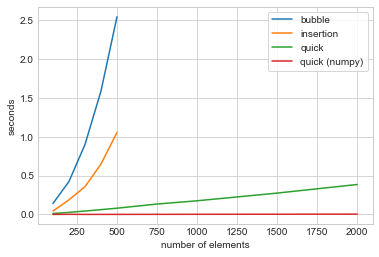

In [34]:
# a. settings
n_vec = np.array([100,200,300,400,500,750,1000,1500,2000,4000,8000,16000]) # number of elements in list
K = 50 # number of repetitions when timing

# b. allocate vectors for results
bubble = np.empty(len(n_vec))
insertion = np.empty(len(n_vec))
quick = np.empty(len(n_vec))
quicknp = np.empty(len(n_vec))

# c. run time trials
np.random.seed(1999)
for i,n in enumerate(n_vec):
    
    # i. draw K random lists of lenght n
    L_bubble = []
    L_insertion = []
    L_quick = []
    L_quicknp = []
    for k in range(K):
        L = np.random.uniform(size=n)
        np.random.shuffle(L)
        L_bubble.append(L.copy())
        L_insertion.append(L.copy())
        L_quick.append(L.copy())
        L_quicknp.append(L.copy())
        
    # ii. bubble sort
    if n <= 500:
        t0 = time.time() # start timer
        for k in range(K):
            bubble_sort(L_bubble[k])
        bubble[i] = time.time()-t0 # calculate time since start
    else: 
        bubble[i] = np.nan
        
    # ii. insertion sort
    if n <= 500:
        t0 = time.time()
        for k in range(K):
            insertion_sort(L_insertion[k])
        insertion[i] = time.time()-t0
    else: 
        insertion[i] = np.nan
        
    # iii. quicksort
    if n <= 2000:
        t0 = time.time()
        for k in range(K):
            quick_sort(L_quick[k])
        quick[i] = time.time()-t0
    else: 
        quick[i] = np.nan
        
    # iii. quicksort (numpy implementation)    
    t0 = time.time()
    for k in range(K):
        L_quicknp[k].sort() # built-in numpy method
    quicknp[i] = time.time()-t0
    
    # iv. check that all sorted lists are the same
    for k in range(K):
        if n <= 500:
            assert np.all(L_bubble[k] == L_quick[k])
            assert np.all(L_insertion[k] == L_quick[k])
        if n <= 2000:
            assert np.all(L_quicknp[k] == L_quick[k])
    
# d. figure    
I = n_vec <= 2000
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(n_vec[I],bubble[I],label='bubble')
ax.plot(n_vec[I],insertion[I],label='insertion')
ax.plot(n_vec[I],quick[I],label='quick')
ax.plot(n_vec[I],quicknp[I],label='quick (numpy)')
ax.set_xlabel('number of elements')
ax.set_ylabel('seconds')
ax.legend(facecolor='white',frameon=True);

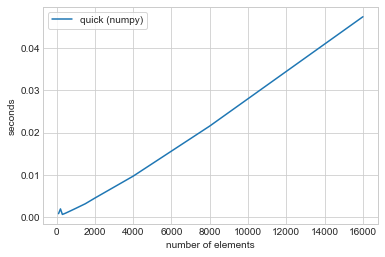

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(n_vec,quicknp,label='quick (numpy)')
ax.set_xlabel('number of elements')
ax.set_ylabel('seconds')
ax.legend(facecolor='white',frameon=True);